<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: Vadim Shestopalov (@vchulski), Valentina Biryukova (@myltykritik), and Yury Kashnitsky (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Fall 2019. Quiz 3. Unsupervised learning & time series. Solution

Prior to working on this quiz, you'd better check out the corresponding course material:
 - [Unsupervised learning: PCA and clustering](https://mlcourse.ai/articles/topic7-unsupervised/), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering)
 - [Time series analysis with Python](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)
 - [Predicting future with Facebook Prophet](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part2_facebook_prophet.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-9-part-2-time-series-with-facebook-prophet)
 
Also, checkout corresponding mlcourse.ai [video lectures](https://mlcourse.ai/lectures)

### Your task is to:
 1. study the materials 
 1. write code where needed
 1. choose answers in the [webform](https://docs.google.com/forms/d/11bOOegz0U3pATEOhBH6ZV1m7sLOAcc-n0C9WjJygEQE)
 
Solutions are discussed during a [live YouTube session](https://youtu.be/xVnCdzGrOfk) on November 16.   You can get up to 10 credits (those points in a web-form, 15 max, will be scaled to a max of 10 credits). 
 
### <center> Deadline for Quiz 3: 2019 November 15, 20:59 GMT (London time)

## Part 1. Unsupervised learning

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz3\_part1\_fall2019__*

**Question 1.** Using the face recognition dataset downloaded with the code below choose the best number of `n_components` to achieve best accuracy on holdout set (holdout part should be 30% of the training set) using SVM model for classification (`SVC`) with the following params: `gamma=0.01` and `class_weight='balanced'` <br> Note: Use random seed equal to `17` everywhere (`train_test_split`, `PCA` and `SVC`). Also, specify `whiten=True` for PCA, this will normalize variances of PCA components and will positively affect classification just like in case of using `StandardScaler`.   

<br> What number of PCA components maximizes holdout accuracy of the SVM model?

 1. 50
 1. 100 **[+]**
 1. 150
 1. 200

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
# Download the data and load it as numpy arrays
lfw_people = fetch_lfw_people(data_home='../../data/faces/',
                              min_faces_per_person=70, resize=0.4)

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_features: 1850
n_classes: 7


//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
for i, count in enumerate(np.bincount(y)):
    print(f'{count} photos of {target_names[i]}' )

77 photos of Ariel Sharon
236 photos of Colin Powell
121 photos of Donald Rumsfeld
530 photos of George W Bush
109 photos of Gerhard Schroeder
71 photos of Hugo Chavez
144 photos of Tony Blair


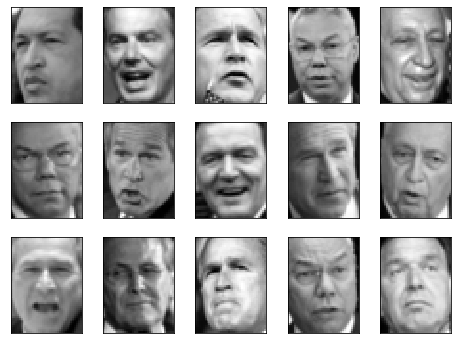

In [4]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

In [5]:
# You code here

import operator

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17)

n_components_l = [50, 100, 150, 200]

scores_d = {}
for n_components in n_components_l: 

    print(f"Fitting the classifier to the training set with n_components: {n_components}")
    pca = PCA(
        n_components=n_components,
        whiten=True,
        random_state=17
    )

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a SVM classification model
    clf = SVC(
        gamma=0.01,
        class_weight='balanced', 
        random_state=17
    )
    clf = clf.fit(X_train_pca, y_train)

    y_pred = clf.predict(X_test_pca)
    acc_score = round(accuracy_score(y_test, y_pred), 2)
    print(f"Holdout accuracy: {acc_score}")
    scores_d.update({n_components: acc_score})

print()
print('-'*33)

print(f"Best accuracy: {max(scores_d.items(), key=operator.itemgetter(1))[1]} with n_components = {max(scores_d.items(), key=operator.itemgetter(1))[0]} ")

### For more information you could read: 
### https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

Fitting the classifier to the training set with n_components: 50
Holdout accuracy: 0.79
Fitting the classifier to the training set with n_components: 100
Holdout accuracy: 0.83
Fitting the classifier to the training set with n_components: 150
Holdout accuracy: 0.74
Fitting the classifier to the training set with n_components: 200
Holdout accuracy: 0.57

---------------------------------
Best accuracy: 0.83 with n_components = 100 


**Question 2**. Choose the correct option. In K-means algorithm at each iteration: 
 1. Centroid of the cluster is moved in a random direction to increase robustness of the solution
 1. Each instance is attributed to a closest centroid  **[+]**
 1. K is increased by 1
 1. All of the above

**Question 3**. Select all correct statements about agglomerative clustering

1. At each step, two random instances are merged to form a cluster
1. The algorithm terminates when all instances are merged into one cluster **[+]**
1. The ultimate number of iterations of the algorithm is $n$, where $n$ is the number of instances in the data set
1. Output of the algorithm depends on the way to define distance between clusters, i.e. *linkage* **[+]**

**Question 4.** For which of the following clustering algorithms shall one specify the number of clusters beforehand?
 1. Agglomerative clustering
 1. K-means **[+]**
 1. Affinity Propagation
 1. All of the above

**Question 5.** Which of the following metrics, assessing clustering quality, can be calculated without knowing true cluster labels?
 1. Adjusted Mutual Information (AMI) 
 1. Silhouette **[+]**
 1. Completeness
 1. None of the above

## Part 2. Time series

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz3\_part2\_fall2019__*

**Question 6.** Which of the following is an example of time series? Select all correct options.
1. Daily temperature in Moscow for 20 years **[+]**
1. Texts of news from Times site
1. Pigeon population in different Russian cities in 2019
1. GPS-coordinates of someone's trajectory **[+]**

**Comments:**

1. Classical Time Series;
1. Text data;
1. Ordinary numerical data;
1. Trajectory is the time series with coordinates, because coordinates are `latitude and longitude` values measured at equal time intervals.

**Question 7.** Which of these are possible components of a time series?
1. Trend
1. Seasonality
1. Noise
1. Cyclical
1. All of the above **[+]**

**Question 8.** Sales of some products in July were 200, in August - 600, in September - 500, in October - 100. What is the 3 month Moving Average forecast for November?
1. 200
1. 300
1. 400 **[+]**
1. 500

**Solution**

If we need 3 month Moving Average forecast, we need to use only 3 last months: August, September and October.  So, the answer is:

In [6]:
ma_result = (600 + 500 + 100) / 3
ma_result

400.0

**Question 9.**
You have some stock (S&P) data [from here](https://www.kaggle.com/camnugent/sandp500/download) for five years until February 2018 and want to make prediction model for Facebook stocks. You need `FB_data.csv` file - it's committed to the course repo as well. 

1. Split the data into training and test sets. Everything before 01.09.2017 (`pd.datetime(2017, 9, 1)`) would form a training set. The rest would be a test set.
2. Train the `Prophet()` model with default parameters
3. Measure MAPE (mean absolute percentage error) for the test set

What test set MAPE do you get (approx)?

1. 2.5% **[+]**
1. 3.5%
1. 4.5%
1. 5.5%

In [7]:
from fbprophet import Prophet

In [8]:
!pip list | grep prophet

fbprophet                          0.4.post2     


In [9]:
df = pd.read_csv('../../data/FB_data.csv')
df = df[['date', 'close']].reset_index(drop=True)
df = df.rename({'close':'y', 'date':'ds'}, axis='columns')
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
df.head()

,ds,y
0,2013-02-08,28.5450
1,2013-02-11,28.2600
2,2013-02-12,27.3700
3,2013-02-13,27.9075
4,2013-02-14,28.5000


In [11]:
# Solution

In [12]:
df_train = df[df['ds'] < pd.datetime(2017, 9, 1)]
df_test = df[df['ds'] >= pd.datetime(2017, 9, 1)]

In [13]:
m = Prophet()
m.fit(df_train);

//anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now we need to make forecast, but we can't make it as it was said in lecture. 

In [14]:
future = m.make_future_dataframe(periods=len(df_test))
print('Future series shape:', future.shape)
future.tail(n=3)

Future series shape: (1259, 1)


,ds
1256,2017-12-16
1257,2017-12-17
1258,2017-12-18


In [24]:
len(future), len(df_train), len(df_test)

(1259, 1150, 109)

As you may see, not all dates are present in the FB_data dataset, because stock exchange works only on business days. So you need to pass exact dates to the algorithm. 
You can also notice that by default Prophet creates series for both train and test datasets, so we can pass a date index to the Prophet's `predict` method. 

In [15]:
future = df[['ds']]
future.tail()

,ds
1254,2018-02-01
1255,2018-02-02
1256,2018-02-05
1257,2018-02-06
1258,2018-02-07


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1254,2018-02-01,181.014719,170.529653,192.079694
1255,2018-02-02,181.241695,170.023697,192.403939
1256,2018-02-05,182.027814,171.344891,193.106708
1257,2018-02-06,182.289669,170.775872,193.562795
1258,2018-02-07,182.683126,171.544051,193.934425


In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
mean_absolute_percentage_error(
    y_true=df_test['y'],
    y_pred=forecast['yhat'][-len(df_test):])

2.5014708684453413

Additionally, just for the sake of beauty, we draw predictions with confidence intervals.

In [19]:
def plot_prediction(actual, prediction, test_size, plot_only_test=False, 
                    plot_intervals=False, plot_anomalies=False):
    """
        actual - actual timeseries
        prediction - predicted timeseries
        test_size - length of test data
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    if plot_only_test:
        prediction = prediction[-test_size:].reset_index(drop=True)
        actual = actual[-test_size:].reset_index(drop=True)
    
    plt.figure(figsize=(20, 10))
    plt.plot(prediction['yhat'], label = "Model")
    plt.plot(actual['y'], label = "Actual")
    error = mean_absolute_percentage_error(actual['y'],
                                           prediction['yhat'])
    plt.title("Prediction MAPE: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*test_size)
        anomalies[actual['y']<prediction['yhat_lower']] = \
            actual['y'][actual['y']<prediction['yhat_lower']]
        anomalies[actual['y']>prediction['yhat_upper']] = \
            actual['y'][actual['y']>prediction['yhat_upper']]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")

    if plot_intervals:
        plt.plot(prediction['yhat_upper'], "r--", alpha=0.5, 
                 label = "Up/Low confidence")
        plt.plot(prediction['yhat_lower'], "r--", alpha=0.5, 
                 label='_nolegend_')
        plt.fill_between(x=range(0,len(prediction['yhat'])), 
                         y1=prediction['yhat_upper'], 
                         y2=prediction['yhat_lower'],
                         alpha=0.2, color = "grey")    
        
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

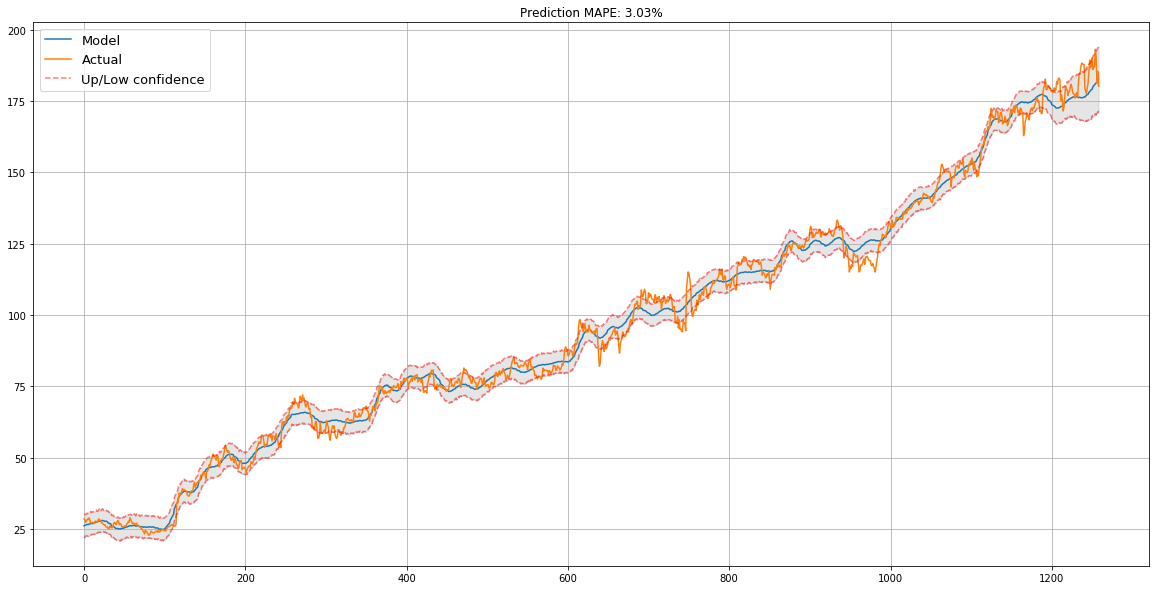

In [20]:
plot_prediction(df, forecast, len(df_test), 
                plot_intervals=True)

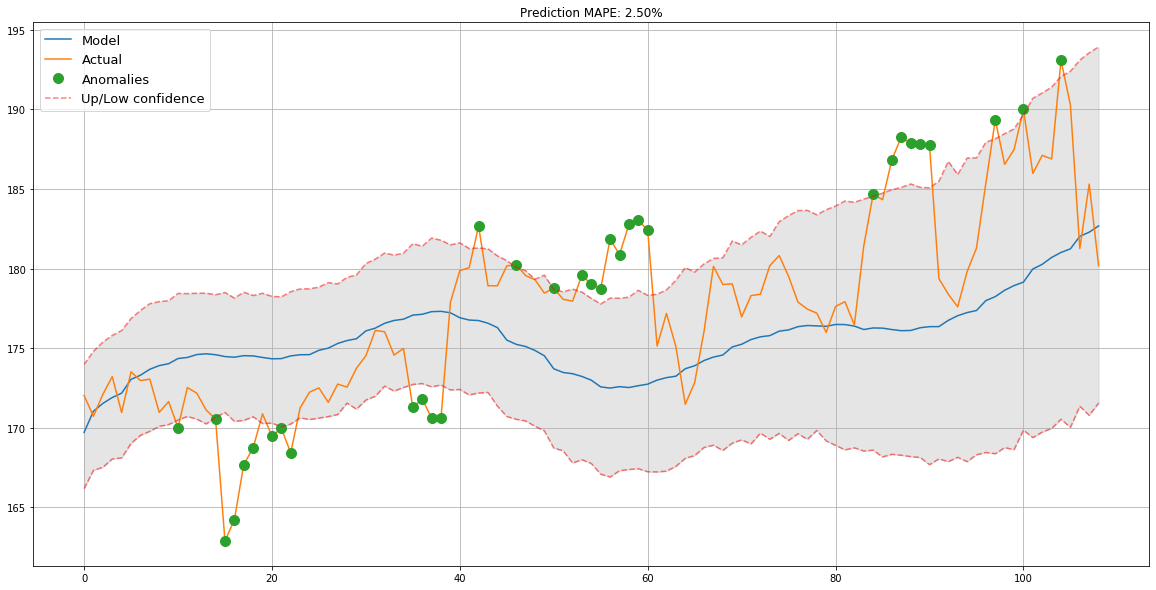

In [21]:
plot_prediction(df, forecast, len(df_test), plot_only_test=True,
                plot_intervals=True, plot_anomalies=True)

**Question 10.** What steps should we perform when doing cross-validation for time series? Select all correct answers.

1. Sort your data by time to emphasize time pattern **[+]**
1. No way! Shuffle all the data well, so model will not leak on random patterns!
1. Make several folds, so in validation will be all data from initial series ↓ [image credit](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85)
    <img src="../../img/kfold.png" width=400>
1. No way! Perform method, known as "cross-validation on a rolling basis". **[+]**
    <img src="../../img/time_series_cv.png" width="400">